In [1]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt
def show_rgb(img):
    img_2 = img[:,:,::-1]
    plt.imshow(img_2)
    plt.show()

In [2]:
def show(img):
    plt.imshow(img,cmap='gray')
    plt.show()

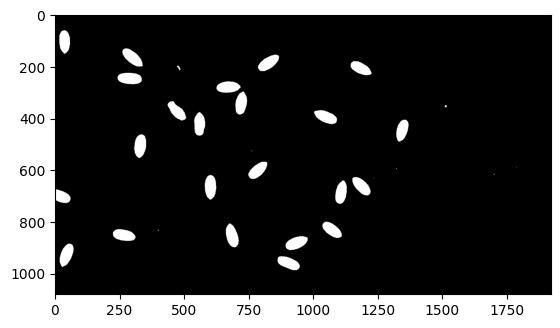

155.0


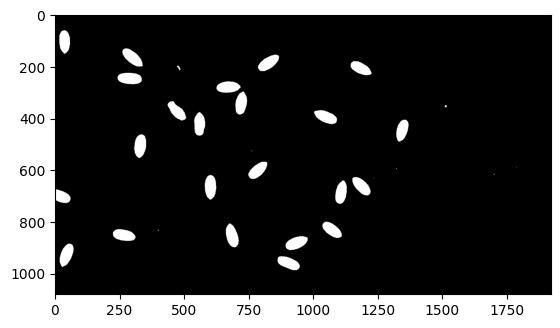

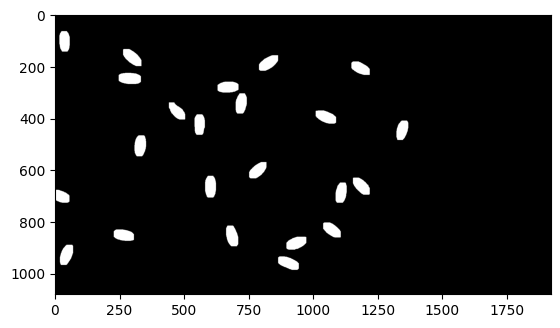

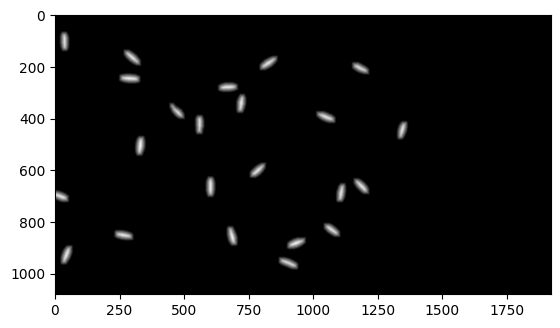

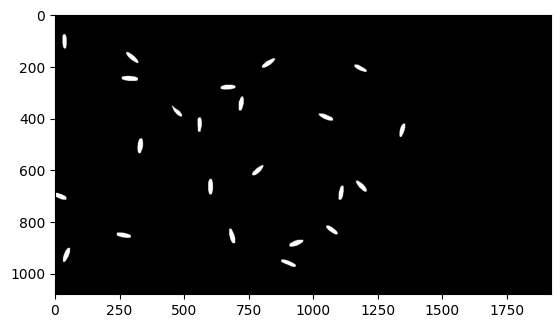

[[-1 -1 -1 ... -1 -1 -1]
 [-1  1  1 ...  1  1 -1]
 [-1  1  1 ...  1  1 -1]
 ...
 [-1  1  1 ...  1  1 -1]
 [-1  1  1 ...  1  1 -1]
 [-1 -1 -1 ... -1 -1 -1]]


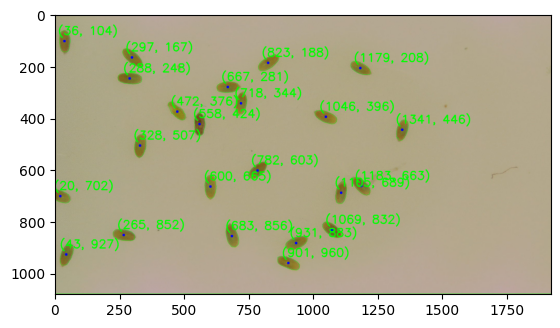

True

In [5]:
# cam = cv2.VideoCapture(1, cv2.CAP_DSHOW)
# cam.set(3,1920)
# cam.set(4,1080)
# ret, img = cam.read()
# img = cv2.imread("./img/2.jpg")
img = cv2.imread("D:\Saka\Pictures\Camera Roll\WIN_20221024_10_33_27_Pro.jpg")
# show_rgb(img)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_b, img_g, img_r= cv2.split(img)
cv2.imwrite('./img/img_b.jpg', img_b)
cv2.imwrite('./img/img_g.jpg', img_g)
cv2.imwrite('./img/img_r.jpg', img_r)
# reverse
img_rev = 255 - img_b
cv2.imwrite('./img/img_rev.jpg', img_rev)
# gaussian blur
# img_blur = cv2.GaussianBlur(img_rev,(3,3),0)
img_blur = img_rev
cv2.imwrite('./img/img_blur.jpg', img_blur)
# ret,img_th = cv2.threshold(img_blur,155,255,cv2.THRESH_BINARY)
ret, img_th = cv2.threshold(img_blur,155,255,cv2.THRESH_BINARY)
show(img_th)
print(ret)
show(img_th)
cv2.imwrite('./img/img_th.jpg', img_th)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(img_th,cv2.MORPH_OPEN,kernel, iterations = 10)
cv2.imwrite('./img/img_opening.jpg', opening)
show(opening)
# sure background area
kernel = np.ones((3,3),np.uint8)
sure_bg = cv2.dilate(opening,kernel,iterations=3)
cv2.imwrite('./img/img_sure_bg.jpg', sure_bg)
# show(sure_bg)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
show(dist_transform)
cv2.imwrite('./img/img_dist_transform.jpg', dist_transform)
ret, sure_fg = cv2.threshold(dist_transform,0.55*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
cv2.imwrite('./img/img_sure_fg.jpg', sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
cv2.imwrite('./img/img_unknown.jpg', unknown)
show(sure_fg)
# show(unknown)

# Marker labelling
img_cp = img.copy()
numbers, markers, stats, centroids = cv2.connectedComponentsWithStats(sure_fg)
# show(markers)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img_cp,markers)
# markers[markers >= 0] = 255
print(markers)
img_cp[markers == -1] = [0,255,0]
# show_rgb(img_cp)
obj_center = []
for i, center in enumerate(centroids):
#     print(stats[i][-1])
    # area filtering
    # TODO: find suitable area
    if 500 < stats[i][-1] < 1300:
        center = center.astype(int)
        obj_center.append(center)
    #         print(center[0], center[1], stats[i])
        cv2.circle(img_cp, (center[0], center[1]), 5, (255, 0, 0), -1)
        cv2.putText(img_cp, f'({center[0]}, {center[1]})', (center[0] - 25, center[1] - 25), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 3)
#         cv2.putText(img_cp,  str(stats[i][-1]), (center[0] - 25, center[1] + 25), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 3)
        # crop one egg frop image
        top = 0 if (center[1]-50 < 0) else center[1]-50
        down = 1080 if (center[1]+50 > 1080) else center[1]+50
        left = 0 if (center[0]-50 < 0) else center[0]-50
        right = 1920 if (center[0]+50 > 1920) else center[0]+50


#         crop_img = img[top:down, left:right]
        # print(crop_img)
show_rgb(img_cp)
cv2.imwrite('./img/img_cp.jpg', img_cp)



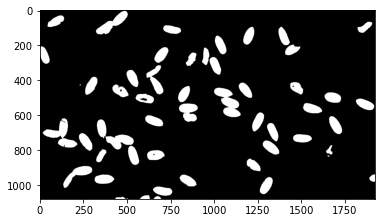

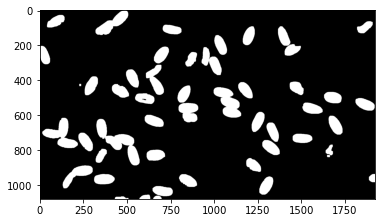

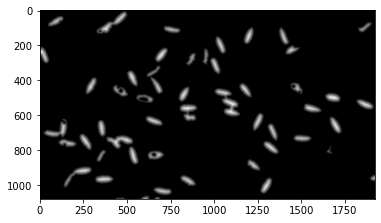

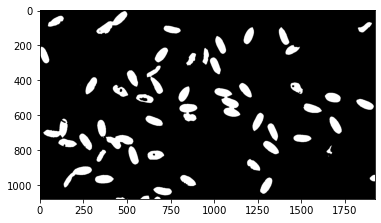

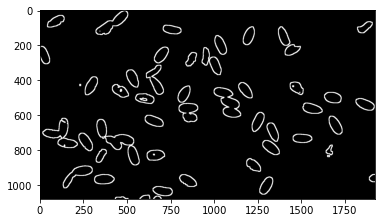

In [62]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(img_th,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
show(opening)
show(sure_bg)
show(dist_transform)
show(sure_fg)
show(unknown)

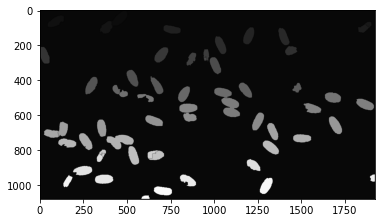

True

In [70]:
# show(markers)
test = markers
test = cv2.normalize(test, None, 0, 255, cv2.NORM_MINMAX)
show(test)
cv2.imwrite('./img/watershed.jpg', test)

test2 = cv2.normalize(dist_transform, None, 0, 255, cv2.NORM_MINMAX)
cv2.imwrite('./img/img_dist_transform.jpg', test2)

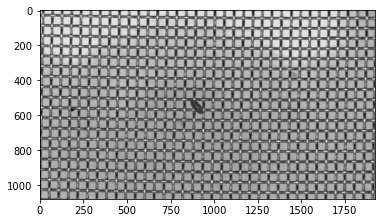

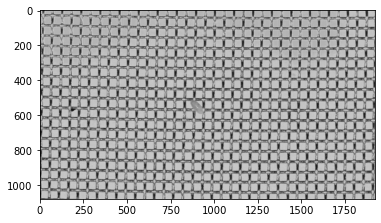

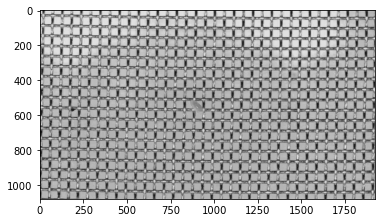

In [5]:
show(img_b)
show(img_g)
show(img_r)

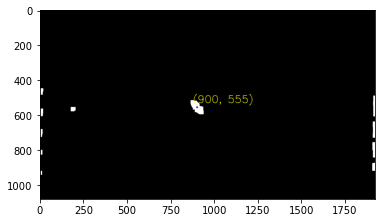

True

In [6]:
# find center
img_center = img_close.copy()
# find contours in the binary image
contours, hierarchy = cv2.findContours(img_center, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_center = cv2.cvtColor(img_center, cv2.COLOR_GRAY2BGR)
for c in contours:
    # calculate moments for each contour
    M = cv2.moments(c)
    if cv2.contourArea(c)>2500:
        # calculate x,y coordinate of center
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.circle(img_center, (cX, cY), 5, (255, 0, 0), -1)
        cv2.putText(img_center, f'({cX}, {cY})', (cX - 25, cY - 25), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 255), 2)
show_rgb(img_center)
cv2.imwrite('center.jpg', img_center)

242.0
661.5
349.0
1092.5
576.5
1065.0
706.0
621.5
3712.5
1088.0
597.5


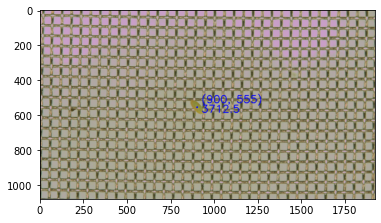

True

In [7]:
img_center = img.copy()
for c in contours:
    # calculate moments for each contour
    print(cv2.contourArea(c))
    M = cv2.moments(c)
    if cv2.contourArea(c)>2500:
        # calculate x,y coordinate of center
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.putText(img_center, f'{cv2.contourArea(c)}', (cX + 25 , cY + 30), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3)
        cv2.circle(img_center, (cX, cY), 5, (255, 0, 0), -1)
        cv2.putText(img_center, f'({cX}, {cY})', (cX + 25, cY - 25), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3)
show_rgb(img_center)
cv2.imwrite('center_filltered.jpg', img_center)

In [7]:
image = ImageProcessing()
center3 = image.find_center()

In [11]:
center3[0][0]

971

In [7]:
import cv2


cam = cv2.VideoCapture(1)
# cam.set(3,1920)
# cam.set(4,1080)
print(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))
cv2.namedWindow("test")

img_counter = 0

ret, img = cam.read()
if not ret:
    print("failed to grab frame")
show_rgb(frame)
cv2.imwrite("test.jpg", frame)

# k = cv2.waitKey(1)
# if k%256 == 27:
#     # ESC pressed
#     print("Escape hit, closing...")
#     break
# elif k%256 == 32:
#     # SPACE pressed
#     img_name = "opencv_frame_{}.png".format(img_counter)
#     cv2.imwrite(img_name, frame)
#     print("{} written!".format(img_name))
#     img_counter += 1

cam.release()

cv2.destroyAllWindows()

640.0
480.0


TypeError: 'NoneType' object is not subscriptable

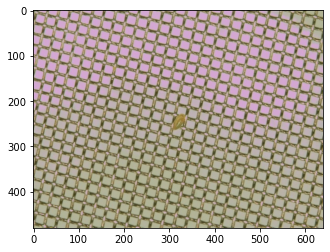

In [9]:
show_rgb(img)

In [4]:
from mt24x import MT24X
motor = MT24X('COM3', 115200)

SerialException: could not open port 'COM3': PermissionError(13, '存取被拒。', None, 5)

In [2]:
from image import ImageProcessing
cam = ImageProcessing()

load camera finished


GET_P 0 <- 40200
GET_P 1 <- 39800
L_ACC_DEC_V 0 3000 3000 1000 <- OK
L_ABS 0 0 1 40240 39760 <- OK
GET_RUN 0 <- 1
GET_RUN 0 <- 0
GET_RUN 1 <- 0
GET_RUN 2 <- 0
save images at: calibration/calibration_0.jpg
[(970, 385)]
L_ACC_DEC_V 0 3000 3000 1000 <- OK
L_ABS 0 0 1 -17 276 <- OK
GET_RUN 0 <- 1
GET_RUN 0 <- 0
GET_RUN 1 <- 0
GET_RUN 2 <- 0
L_ACC_DEC_V 0 3000 3000 1000 <- OK
L_ABS 0 0 1 40220 39764 <- OK
GET_RUN 0 <- 1
GET_RUN 0 <- 0
GET_RUN 1 <- 0
GET_RUN 2 <- 0
save images at: calibration/calibration_1.jpg
[(958, 344)]
L_ACC_DEC_V 0 3000 3000 1000 <- OK
L_ABS 0 0 1 3 349 <- OK
GET_RUN 0 <- 1


KeyboardInterrupt: 

In [4]:
motor.calibration(0,2000,2000,1000)
motor.calibration(1,2000,2000,1000)


MODE_H 0 1 <- OK
H_ACC_DEC 0 2000 2000 <- OK
H_V 0 1000 <- OK
MODE_H 1 1 <- OK
H_ACC_DEC 1 2000 2000 <- OK
H_V 1 1000 <- OK


In [13]:
motor.move_MODE_L("0 1", 2000, 2000, 1000, "50000 50000")

L_ACC_DEC_V 0 2000 2000 1000 <- OK
L_ABS 0 0 1 50000 50000 <- OK

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RU